## install libs

In [ ]:
%%capture
!pip install datasets
!pip install -U huggingface_hub
!pip install Unidecode

In [ ]:
%%capture
!pip install openai

In [ ]:
# login to HF HUB
from huggingface_hub import login
from google.colab import userdata

login(userdata.get('HF_TOKEN'))

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


## load dataset

In [ ]:
from datasets import load_dataset

declarations_ds = load_dataset("the-french-artist/hatvp_stock_participationFinanciereDto", split='train')

In [ ]:
declarations_ds

Dataset({
    features: ['declaration_uuid', 'declaration_publication_date', 'declarant_name', 'declarant_surname', 'declarant_birthdate', 'nomSociete', 'evaluation', 'remuneration', 'capitalDetenu', 'nombreParts', 'actiConseil', 'commentaire', 'declarant_unique_id'],
    num_rows: 11060
})

In [ ]:
declarations_df = declarations_ds.to_pandas()

In [ ]:
declarations_df.head()

,declaration_uuid,declaration_publication_date,declarant_name,declarant_surname,declarant_birthdate,nomSociete,evaluation,remuneration,capitalDetenu,nombreParts,actiConseil,commentaire,declarant_unique_id
0,4344aaa1-874d-4e6d-9b1a-45f7725b710c,2022-07-11 15:40:13,ABAD,DAMIEN,05/04/1980,ORANGE,877,néant,NaN,83.0,Non,[Données non publiées],ABAD-DAMIEN-05/04/1980
1,4344aaa1-874d-4e6d-9b1a-45f7725b710c,2022-07-11 15:40:13,ABAD,DAMIEN,05/04/1980,CREDIT AGRICOLE SA,2910,néant,NaN,341.0,Non,[Données non publiées],ABAD-DAMIEN-05/04/1980
2,4344aaa1-874d-4e6d-9b1a-45f7725b710c,2022-07-11 15:40:13,ABAD,DAMIEN,05/04/1980,AIRBUS,1929,NEANT,NaN,20.0,Non,[Données non publiées],ABAD-DAMIEN-05/04/1980
3,4344aaa1-874d-4e6d-9b1a-45f7725b710c,2022-07-11 15:40:13,ABAD,DAMIEN,05/04/1980,L'OREAL,6552,NEANT,NaN,20.0,Non,[Données non publiées],ABAD-DAMIEN-05/04/1980
4,fa8d18ec-0db9-4a39-b1f4-caba0c31329b,2022-11-27 18:18:23,ABAD,DAMIEN,05/04/1980,ORANGE,877,néant,NaN,83.0,Non,[Données non publiées],ABAD-DAMIEN-05/04/1980


## Analysis  

We perform various analysis to learn new things about popular companies and evaluations among politicians.  

### Filter on latest declaration  

To prevent data from being deplicated across several declarations made by a single individual, we only keep the last declaration for each unique declarant.  

In [ ]:
declarations_df.head()

,declaration_uuid,declaration_publication_date,declarant_name,declarant_surname,declarant_birthdate,nomSociete,evaluation,remuneration,capitalDetenu,nombreParts,actiConseil,commentaire,declarant_unique_id
0,4344aaa1-874d-4e6d-9b1a-45f7725b710c,2022-07-11 15:40:13,ABAD,DAMIEN,05/04/1980,ORANGE,877,néant,NaN,83.0,Non,[Données non publiées],ABAD-DAMIEN-05/04/1980
1,4344aaa1-874d-4e6d-9b1a-45f7725b710c,2022-07-11 15:40:13,ABAD,DAMIEN,05/04/1980,CREDIT AGRICOLE SA,2910,néant,NaN,341.0,Non,[Données non publiées],ABAD-DAMIEN-05/04/1980
2,4344aaa1-874d-4e6d-9b1a-45f7725b710c,2022-07-11 15:40:13,ABAD,DAMIEN,05/04/1980,AIRBUS,1929,NEANT,NaN,20.0,Non,[Données non publiées],ABAD-DAMIEN-05/04/1980
3,4344aaa1-874d-4e6d-9b1a-45f7725b710c,2022-07-11 15:40:13,ABAD,DAMIEN,05/04/1980,L'OREAL,6552,NEANT,NaN,20.0,Non,[Données non publiées],ABAD-DAMIEN-05/04/1980
4,fa8d18ec-0db9-4a39-b1f4-caba0c31329b,2022-11-27 18:18:23,ABAD,DAMIEN,05/04/1980,ORANGE,877,néant,NaN,83.0,Non,[Données non publiées],ABAD-DAMIEN-05/04/1980


Get couples of unique IDs and latest declaration date

In [ ]:
latest_date_df = declarations_df.groupby('declarant_unique_id')['declaration_publication_date'].max().reset_index()
latest_date_df

,declarant_unique_id,declaration_publication_date
0,ABAD-DAMIEN-05/04/1980,2022-11-27 18:18:23
1,ABADIE-CAROLINE-07/09/1976,2022-10-04 17:22:07
2,ABAUX-BRIGITTE-24/02/1950,2021-08-21 19:39:06
3,ABBAS-GÉRARD-07/06/1944,2021-08-23 21:37:05
4,ABELIN-JEAN-PIERRE-03/09/1950,2021-05-09 21:06:24
...,...,...
1899,ZIEGLER-GEORGES-20/10/1949,2021-12-27 10:57:24
1900,ZILIO-ANTHONY-17/03/1985,2020-12-28 20:16:10
1901,ZINGRAFF-MARC-11/01/1960,2023-03-30 16:38:04
1902,ZOURGUI-NADIA-09/06/1969,2022-02-15 11:07:33


For each couple, take the corresponding rows from dataset:

In [ ]:
to_keep_dfs = []
for curr_id, curr_date in zip(latest_date_df['declarant_unique_id'].to_list(), latest_date_df['declaration_publication_date'].to_list()):
  to_keep_dfs.append(declarations_df[(declarations_df['declarant_unique_id'] == curr_id) & (declarations_df['declaration_publication_date'] == curr_date)])

Rebuild a single dataset:

In [ ]:
import pandas as pd
unique_stocks_df = pd.concat(to_keep_dfs)

In [ ]:
# we see that only the latest declaration has been kept
unique_stocks_df[unique_stocks_df['declarant_name'] == 'ABAD']

,declaration_uuid,declaration_publication_date,declarant_name,declarant_surname,declarant_birthdate,nomSociete,evaluation,remuneration,capitalDetenu,nombreParts,actiConseil,commentaire,declarant_unique_id
4,fa8d18ec-0db9-4a39-b1f4-caba0c31329b,2022-11-27 18:18:23,ABAD,DAMIEN,05/04/1980,ORANGE,877,néant,NaN,83.0,Non,[Données non publiées],ABAD-DAMIEN-05/04/1980
5,fa8d18ec-0db9-4a39-b1f4-caba0c31329b,2022-11-27 18:18:23,ABAD,DAMIEN,05/04/1980,CREDIT AGRICOLE SA,2910,néant,NaN,341.0,Non,[Données non publiées],ABAD-DAMIEN-05/04/1980
6,fa8d18ec-0db9-4a39-b1f4-caba0c31329b,2022-11-27 18:18:23,ABAD,DAMIEN,05/04/1980,AIRBUS,1929,NEANT,NaN,20.0,Non,[Données non publiées],ABAD-DAMIEN-05/04/1980
7,fa8d18ec-0db9-4a39-b1f4-caba0c31329b,2022-11-27 18:18:23,ABAD,DAMIEN,05/04/1980,L'OREAL,6552,NEANT,NaN,20.0,Non,[Données non publiées],ABAD-DAMIEN-05/04/1980


In [ ]:
unique_stocks_df_raw = unique_stocks_df.copy(deep=True)

### Count company names  

We format and filter out irrelevant values, then count the occurences.  

In [ ]:
unique_stocks_df['nomSociete'] = unique_stocks_df['nomSociete'].str.upper()
unique_stocks_df['nomSociete'] = unique_stocks_df['nomSociete'].str.strip()

In [ ]:
# remove values that contain this string
unique_stocks_df = unique_stocks_df[~unique_stocks_df['nomSociete'].str.contains("DONNÉES NON PUBLIÉES")]
unique_stocks_df = unique_stocks_df[~unique_stocks_df['nomSociete'].str.contains("GFA")]
unique_stocks_df = unique_stocks_df[~unique_stocks_df['nomSociete'].str.contains("SCIC")]
unique_stocks_df = unique_stocks_df[~unique_stocks_df['nomSociete'].str.contains("EARL")]
unique_stocks_df = unique_stocks_df[~unique_stocks_df['nomSociete'].str.contains("SARL")]

In [ ]:
# remove values that match exacly these strings
values_to_filter_out = [
  "NÉANT",
  "NEANT",
  "PEA",
  "0",
]

unique_stocks_df = unique_stocks_df[~unique_stocks_df['nomSociete'].isin(values_to_filter_out)]

In [ ]:
top_stocks = unique_stocks_df.nomSociete.value_counts().to_frame().reset_index()
top_stocks

,nomSociete,count
0,ORANGE,68
1,AIR LIQUIDE,62
2,ENGIE,60
3,CRÉDIT AGRICOLE,45
4,SANOFI,45
...,...,...
2130,CREDI AGRICOLE S.A.,1
2131,PHI SAS,1
2132,FRANÇAISE DES JEUX JDJ,1
2133,PSV CACB BEAUNE,1


In [ ]:
unique_stocks_df_for_later = unique_stocks_df.copy(deep=True)

We see some issues with the naming of stocks: many companies have fuzzy names (accent/no accent, missing space char, mixed with other names, etc.)

In [ ]:
top_stocks[top_stocks['nomSociete'].str.contains('AGRICOLE')]

,nomSociete,count
3,CRÉDIT AGRICOLE,45
6,CREDIT AGRICOLE,44
39,CRÉDIT AGRICOLE SA,11
62,CREDIT AGRICOLE SA,7
213,COMPTE TITRES CREDIT AGRICOLE,2
400,CAISSE RÉGIONALE DE CRÉDIT AGRICOLE CENTRE FRANCE,1
579,CREDIT AGRICOLE PS,1
607,CAISSE RÉGIONALE DE CRÉDIT AGRICOLE NMP,1
673,"12 LIGNES DE PEA AXA, SANOFI, SOCIÉTÉ GÉNÉRALE...",1
698,COMPTE PARTS SOCIALES CRÉDIT AGRICOLE,1


In [ ]:
top_stocks[top_stocks['nomSociete'].str.contains('ORANGE')]

,nomSociete,count
0,ORANGE,68
518,COMPTE TITRE ORANGE,1
673,"12 LIGNES DE PEA AXA, SANOFI, SOCIÉTÉ GÉNÉRALE...",1
1183,PEA ACTIONS ORANGE,1
1804,PERCO ORANGE,1
1805,ORANGE ACTIONS CLASSIQUE,1
1826,ORANGE FR,1


As a simple fix, to get quick results, we:  

- remove accents from the complete company name string  
- replace '-' by a space
- only keep the first two words  

In [ ]:
from unidecode import unidecode

unidecode('CRÉDIT AGRICOLE')

'CREDIT AGRICOLE'

In [ ]:
unique_stocks_df['nomSociete'] = unique_stocks_df.nomSociete.apply(unidecode)

In [ ]:
unique_stocks_df['nomSociete'] = unique_stocks_df['nomSociete'].str.replace('-', ' ')
unique_stocks_df['nomSociete'] = unique_stocks_df['nomSociete'].str.replace("'", ' ')

In [ ]:
def keep_first_two_words_max(input_string):
  return ' '.join(input_string.split(' ')[:2])

unique_stocks_df['nomSociete'] = unique_stocks_df.nomSociete.apply(keep_first_two_words_max)

In [ ]:
top_stocks = unique_stocks_df.nomSociete.value_counts().to_frame().reset_index()
top_stocks

,nomSociete,count
0,CREDIT AGRICOLE,121
1,ORANGE,68
2,AIR LIQUIDE,64
3,ENGIE,60
4,AXA,45
...,...,...
1912,TRANSGENE,1
1913,PHARNEXT,1
1914,ANATOLE,1
1915,ICADE,1


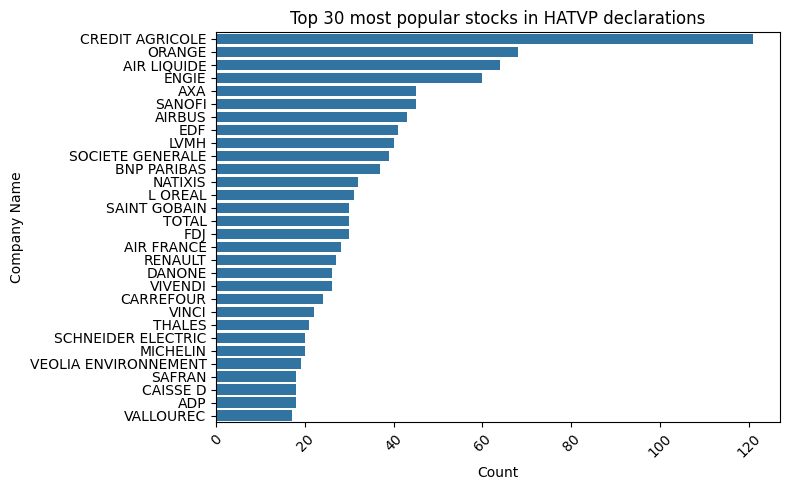

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting with seaborn
plt.figure(figsize=(8, 5))
sns.barplot(y='nomSociete', x='count', data=top_stocks.head(30))
plt.title('Top 30 most popular stocks in HATVP declarations')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### Find actual stock name ?  

We try to use chatGPT to get the actual stock name.

In [ ]:
from google.colab import userdata
from openai import OpenAI
client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))

def get_correct_company_name(company_name):
  response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
      {"role": "system", "content": """
You will receive a publicly traded company name. It might be written incorrectly. Your goal is to reply the correct company name.
Only reply the company name, or "unknown" if the name is unknown.
"""},
      {"role": "user", "content": f"{company_name}"},
    ]
  )

  return response.choices[0].message.content

In [ ]:
get_correct_company_name("L'OREAL")

"L'Oréal"

In [ ]:
get_correct_company_name("L'OREAL")

"L'Oréal"

In [ ]:
get_correct_company_name('COMPTE TITRE ORANGE	')

'Orange SA'

In [ ]:
get_correct_company_name('PERCO ORANGE	')

'unknown'

In [ ]:
unique_stocks_df = unique_stocks_df_for_later.copy(deep=True)

We select stocks that are at least present in two declarations:

In [ ]:
top_stocks = unique_stocks_df.nomSociete.value_counts().to_frame().reset_index()
top_stocks

,nomSociete,count
0,ORANGE,68
1,AIR LIQUIDE,62
2,ENGIE,60
3,CRÉDIT AGRICOLE,45
4,SANOFI,45
...,...,...
2130,CREDI AGRICOLE S.A.,1
2131,PHI SAS,1
2132,FRANÇAISE DES JEUX JDJ,1
2133,PSV CACB BEAUNE,1


In [ ]:
from tqdm.auto import tqdm
tqdm.pandas()

top_stocks['inferred_company_name'] = top_stocks.nomSociete.progress_apply(get_correct_company_name)

  0%|          | 0/2135 [00:00<?, ?it/s]

In [ ]:
top_stocks

,nomSociete,count,inferred_company_name
0,ORANGE,68,Orange SA
1,AIR LIQUIDE,62,AIR LIQUIDE
2,ENGIE,60,ENGIE
3,CRÉDIT AGRICOLE,45,Crédit Agricole
4,SANOFI,45,Sanofi
...,...,...,...
2130,CREDI AGRICOLE S.A.,1,Crédit Agricole S.A.
2131,PHI SAS,1,Unknown
2132,FRANÇAISE DES JEUX JDJ,1,FRANÇAISE DES JEUX
2133,PSV CACB BEAUNE,1,Unknown


In [ ]:
from datasets import Dataset

top_stocks_ds = Dataset.from_pandas(top_stocks)

In [ ]:
top_stocks_ds.push_to_hub("the-french-artist/inferred_stock_names")


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/the-french-artist/inferred_stock_names/commit/7df95edae2101ab90c0b6fae6f4e2d1aff4eeb8e', commit_message='Upload dataset', commit_description='', oid='7df95edae2101ab90c0b6fae6f4e2d1aff4eeb8e', pr_url=None, pr_revision=None, pr_num=None)